In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data.csv")

# Visualization & Cleaning

In [5]:
df.head()

,id,ela,financeAmount,address1,address2,address3,state,city,postcode,applicationStatus,netSalary,loanTenure,interestRate,loanApplied,jobTitle,loanReason
0,007205fb-fde6-4d04-9778-5ae2d4b8c9f1,5000.0,5000.0,PT 2344 JLN SRI PERASING,4/2 TMN SRI PERASING JAYA,JABOR,TERENGGANU,CUKAI,24000.0,REJECTED,1900.0,18,18,5000,ADMIN CLERK,DEBTS CONSOLIDATION
1,007696e0-6d33-4e55-a48a-17797191bdde,0.0,0.0,UNIT A-11-9 DOMAIN 2,LINGKARAN CYBER POINT BARAT,TAMAN NEOCYBER,SELANGOR,CYBERJAYA,63000.0,REJECTED,7260.0,24,18,10000,MANAGER OPERATION,RENOVATION
2,00ec2449-39df-4018-881c-2185dcaea9ab,49000.0,6000.0,"3346JLN PASIR PUTEH,KG TEMBESU LIMBAT",NaN,NaN,KELANTAN,KOTA BHARU,16150.0,REJECTED,4000.0,24,18,6000,SALE ADVISOR,DEBTS CONSOLIDATION
3,0122f896-fc97-46bf-8408-de443cfa6c63,6000.0,1000.0,"NO 1319, JALAN CEMPAKA INDAH 16",TAMAN CEMPAKA INDAH,BUKIT SELAMBAU,KEDAH,SUNGAI PETANI,8010.0,APPROVED,1200.0,12,18,1500,CUSTOMER SERVICE,DEBTS CONSOLIDATION
4,0131b663-f9c9-40fc-9149-c110e4cc4a22,0.0,0.0,PT 2326,TAMAN ROS SETIA,JUASSEH,NEGERI SEMBILAN,KUALA PILAH,72500.0,REJECTED,3948.0,24,18,5000,CLERK,DEBTS CONSOLIDATION


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 1000 non-null   object 
 1   ela                939 non-null    float64
 2   financeAmount      939 non-null    float64
 3   address1           998 non-null    object 
 4   address2           862 non-null    object 
 5   address3           416 non-null    object 
 6   state              1000 non-null   object 
 7   city               1000 non-null   object 
 8   postcode           976 non-null    float64
 9   applicationStatus  1000 non-null   object 
 10  netSalary          1000 non-null   float64
 11  loanTenure         1000 non-null   int64  
 12  interestRate       1000 non-null   int64  
 13  loanApplied        1000 non-null   int64  
 14  jobTitle           1000 non-null   object 
 15  loanReason         1000 non-null   object 
dtypes: float64(4), int64(3), 

In [7]:
#Checking duplicated IDs
df['id'].duplicated().sum()



0

In [8]:
#Checking null values
df.isna().sum()

id                     0
ela                   61
financeAmount         61
address1               2
address2             138
address3             584
state                  0
city                   0
postcode              24
applicationStatus      0
netSalary              0
loanTenure             0
interestRate           0
loanApplied            0
jobTitle               0
loanReason             0
dtype: int64

In [9]:
#Checking null values' applicationStatus

todrop = ['id','address1', 'address2', 'address3', 'city', 'postcode']
df_dropped = df.drop(columns=todrop)
rows_with_null_float = df_dropped[df_dropped.select_dtypes(include=['float']).isna().any(axis=1)]
print("Total number of REJECTED or APPROVED applications:")
rows_with_null_float['applicationStatus'].value_counts()




Total number of REJECTED or APPROVED applications:


applicationStatus
REJECTED    61
Name: count, dtype: int64

In [10]:
#Checking 0 values' applicationStatus

rows_with_zero= df_dropped[(df_dropped['ela']== 0) | (df_dropped['financeAmount'] == 0)]
print("Total number of REJECTED or APPROVED applications:")
rows_with_zero['applicationStatus'].value_counts()



Total number of REJECTED or APPROVED applications:


applicationStatus
REJECTED    229
APPROVED      1
Name: count, dtype: int64

In [19]:
#Merged 0 and null values' applicationStatus

marged_empty = df_dropped[df_dropped.select_dtypes(include=['float']).isna().any(axis=1) | (df_dropped['ela']== 0) | (df_dropped['financeAmount'] == 0)]
print("Total number of REJECTED or APPROVED applications:")
marged_empty['applicationStatus'].value_counts()

Total number of REJECTED or APPROVED applications:


applicationStatus
REJECTED    290
APPROVED      1
Name: count, dtype: int64

In [20]:
#To check the oppersite of non empty rows result:
marged_non_empty = df_dropped[~((df_dropped['ela'].isna() | (df_dropped['ela'] == 0)) | 
                                (df_dropped['financeAmount'].isna() | (df_dropped['financeAmount'] == 0)))]

print("Total number of REJECTED or APPROVED applications of non empty values:")
marged_non_empty['applicationStatus'].value_counts()

Total number of REJECTED or APPROVED applications of non empty values:


applicationStatus
REJECTED    498
APPROVED    211
Name: count, dtype: int64

c:\Users\rtr\Work\Python\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\rtr\AppData\Local\Temp\ipykernel_17496\3068008288.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marged_non_empty['cluster'] = clusters


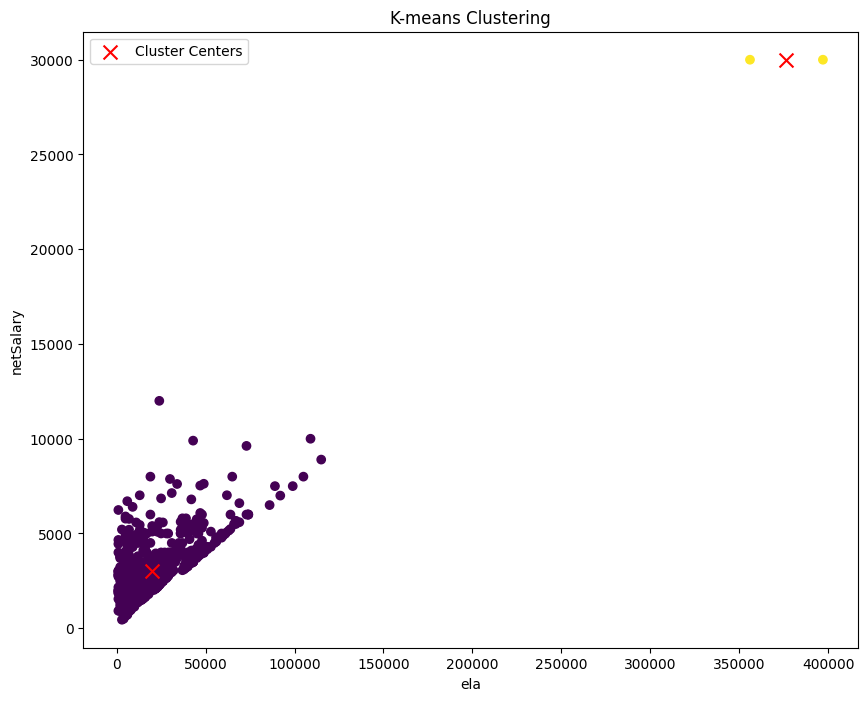

In [21]:
#Checking and removing outliers
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

data_for_clustering = marged_non_empty[['ela', 'netSalary']]

#Standardize the data 
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_clustering)

k = 2

#K-means clustering
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(scaled_data)
marged_non_empty['cluster'] = clusters

#Analyze the clustering results
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_centers_df = pd.DataFrame(cluster_centers, columns=data_for_clustering.columns)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
ax.scatter(marged_non_empty['ela'], marged_non_empty['netSalary'], c=clusters, cmap='viridis')
ax.scatter(cluster_centers_df['ela'], cluster_centers_df['netSalary'],
           c='red', marker='x', s=100, label='Cluster Centers')
ax.set_xlabel('ela')
ax.set_ylabel('netSalary')
plt.legend()
plt.title('K-means Clustering')
plt.show()



Total number of rows left: 707


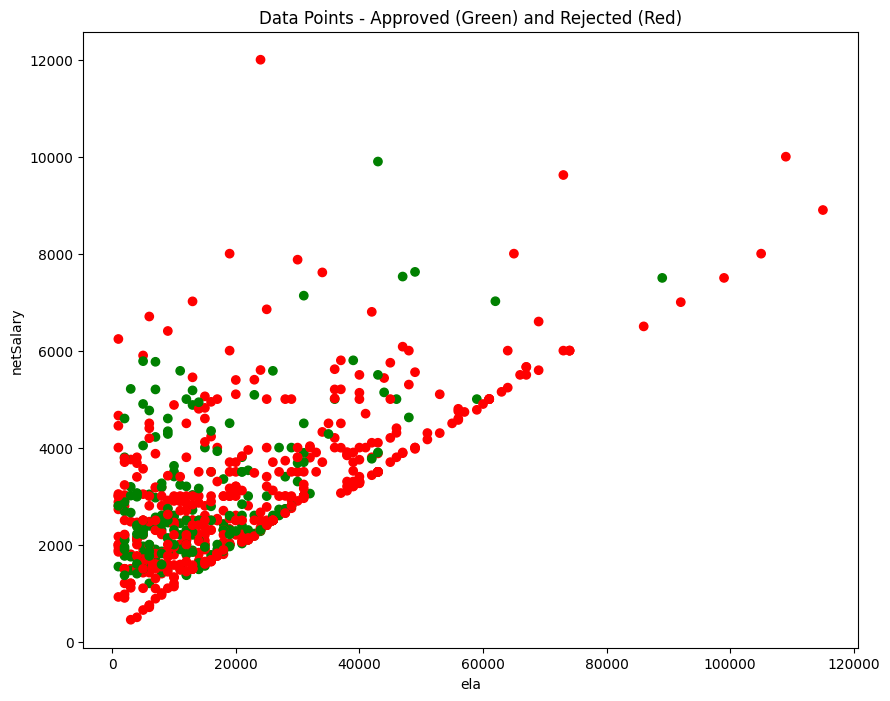

In [22]:
#Removing outlier
mdf_filtered = marged_non_empty[marged_non_empty['cluster'] != 1] 
print('Total number of rows left:', mdf_filtered.shape[0])

colors = {'APPROVED': 'green', 'REJECTED': 'red'}

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
ax.scatter(mdf_filtered['ela'], mdf_filtered['netSalary'], c=mdf_filtered['applicationStatus'].map(colors), label=mdf_filtered['applicationStatus'])
ax.set_xlabel('ela')
ax.set_ylabel('netSalary')
plt.title('Data Points - Approved (Green) and Rejected (Red)')
plt.show()


# Feature Understanding

Loan Reason Percentages by Application Status:
loanReason         DEBTS CONSOLIDATION  EDUCATION  EXPAND BUSINESS  \
applicationStatus                                                    
APPROVED                     36.492891   9.952607        11.374408   
REJECTED                     33.467742  11.693548        13.709677   

loanReason         MEDICAL EXPENSES  OTHER USAGE  RENOVATION  
applicationStatus                                             
APPROVED                   7.109005    20.379147   14.691943  
REJECTED                   6.854839    21.169355   13.104839  


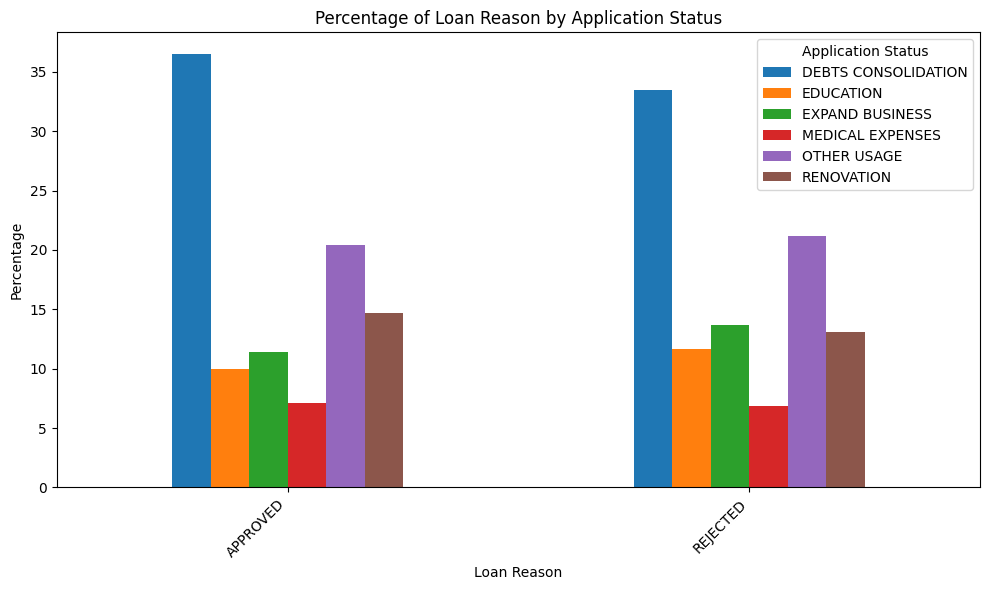

In [23]:
#find impact of loanReason in percentages
loan_reason_counts_grouped = mdf_filtered.groupby(['applicationStatus', 'loanReason']).size().unstack()

total_counts = loan_reason_counts_grouped.sum(axis=1)
loan_reason_percentages = loan_reason_counts_grouped.div(total_counts, axis=0) * 100

print("Loan Reason Percentages by Application Status:")
print(loan_reason_percentages)

loan_reason_percentages.plot(kind='bar', figsize=(10, 6))
plt.title('Percentage of Loan Reason by Application Status')
plt.xlabel('Loan Reason')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Application Status')
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()


In [24]:
#find impact of jobTitle in percentages
job_title_counts_grouped = mdf_filtered.groupby(['applicationStatus', 'jobTitle']).size()

print("Unique Job Title Count by Application Status:")
print(job_title_counts_grouped)


Unique Job Title Count by Application Status:
applicationStatus  jobTitle                
APPROVED           ACADEMIC COUNCELOR          1
                   ACCOUNT & HR ASSISTANT      1
                   ACCOUNT ASSISTANT           1
                   ACCOUNT CLERK               2
                   ACCOUNT CUM ADMIN ASSTN.    1
                                              ..
REJECTED           WAREHOUSE MANAGER           1
                   WAREHOUSE OPERATIONS        1
                   WAREHOUSE SHIFT LEADER      1
                   WAREHOUSE STORE KEEPER      1
                   WELDER                      1
Length: 501, dtype: int64


c:\Users\rtr\Work\Python\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\rtr\Work\Python\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


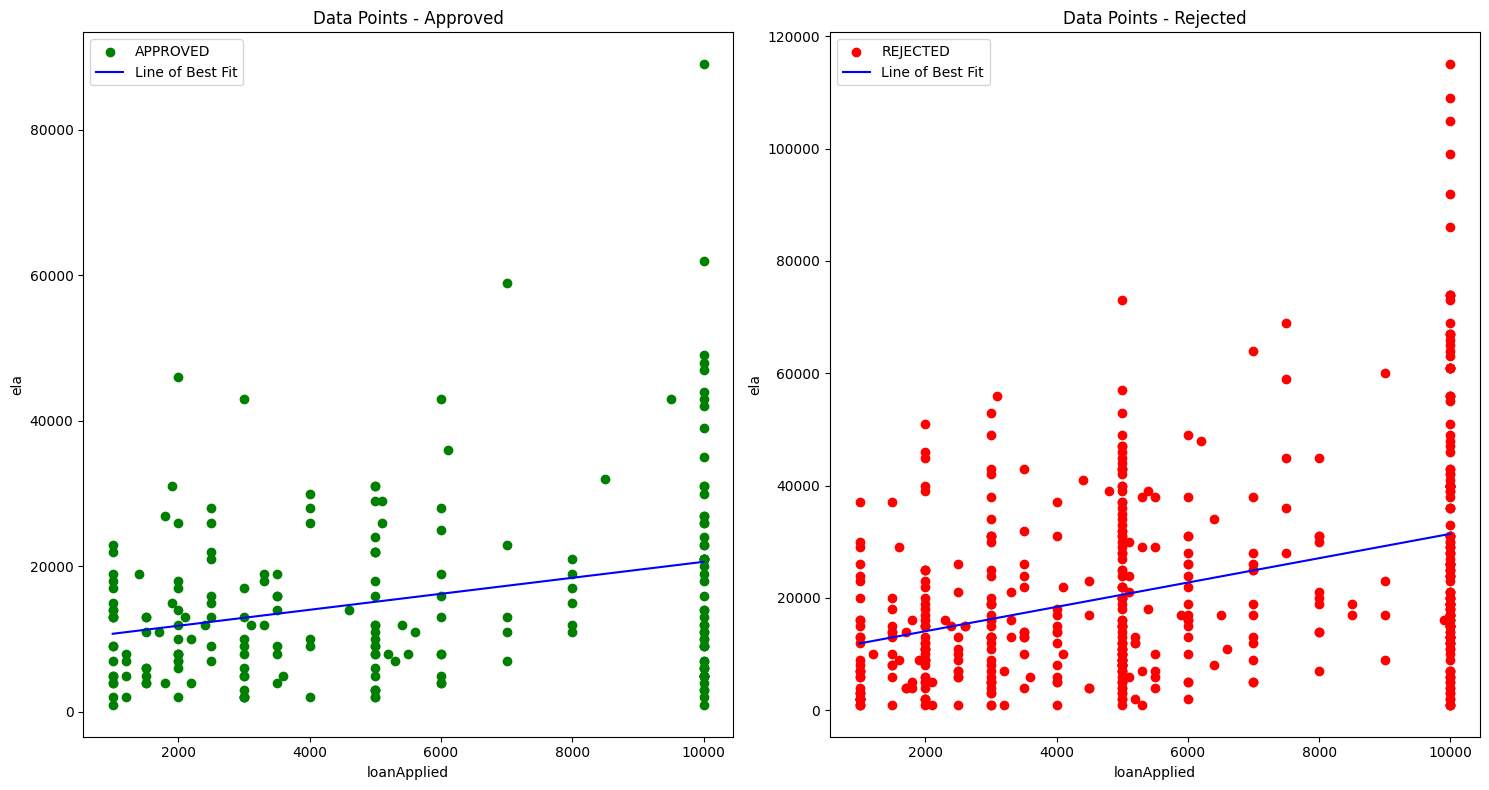

In [25]:
#Checking relationship between ela and loan applied
from sklearn.linear_model import LinearRegression

colors = {'APPROVED': 'green', 'REJECTED': 'red'}

fig, axs = plt.subplots(1, 2, figsize=(15, 8))

#Scatter plot for APPROVED applications
approved_data = mdf_filtered[mdf_filtered['applicationStatus'] == 'APPROVED']
axs[0].scatter(approved_data['loanApplied'], approved_data['ela'], c='green', label='APPROVED')

#Linear regression model for APPROVED applications
regression_model_approved = LinearRegression()
regression_model_approved.fit(approved_data[['loanApplied']], approved_data['ela'])
x_approved = np.linspace(min(approved_data['loanApplied']), max(approved_data['loanApplied']), 100)
y_approved = regression_model_approved.predict(x_approved[:, np.newaxis])
axs[0].plot(x_approved, y_approved, color='blue', label='Line of Best Fit')

axs[0].set_xlabel('loanApplied')
axs[0].set_ylabel('ela')
axs[0].set_title('Data Points - Approved')
axs[0].legend()

#Scatter plot for REJECTED applications
rejected_data = mdf_filtered[mdf_filtered['applicationStatus'] == 'REJECTED']
axs[1].scatter(rejected_data['loanApplied'], rejected_data['ela'], c='red', label='REJECTED')

#Linear regression model for REJECTED applications
regression_model_rejected = LinearRegression()
regression_model_rejected.fit(rejected_data[['loanApplied']], rejected_data['ela'])
x_rejected = np.linspace(min(rejected_data['loanApplied']), max(rejected_data['loanApplied']), 100)
y_rejected = regression_model_rejected.predict(x_rejected[:, np.newaxis])
axs[1].plot(x_rejected, y_rejected, color='blue', label='Line of Best Fit')

axs[1].set_xlabel('loanApplied')
axs[1].set_ylabel('ela')
axs[1].set_title('Data Points - Rejected')
axs[1].legend()

plt.tight_layout()
plt.show()


c:\Users\rtr\Work\Python\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\rtr\Work\Python\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


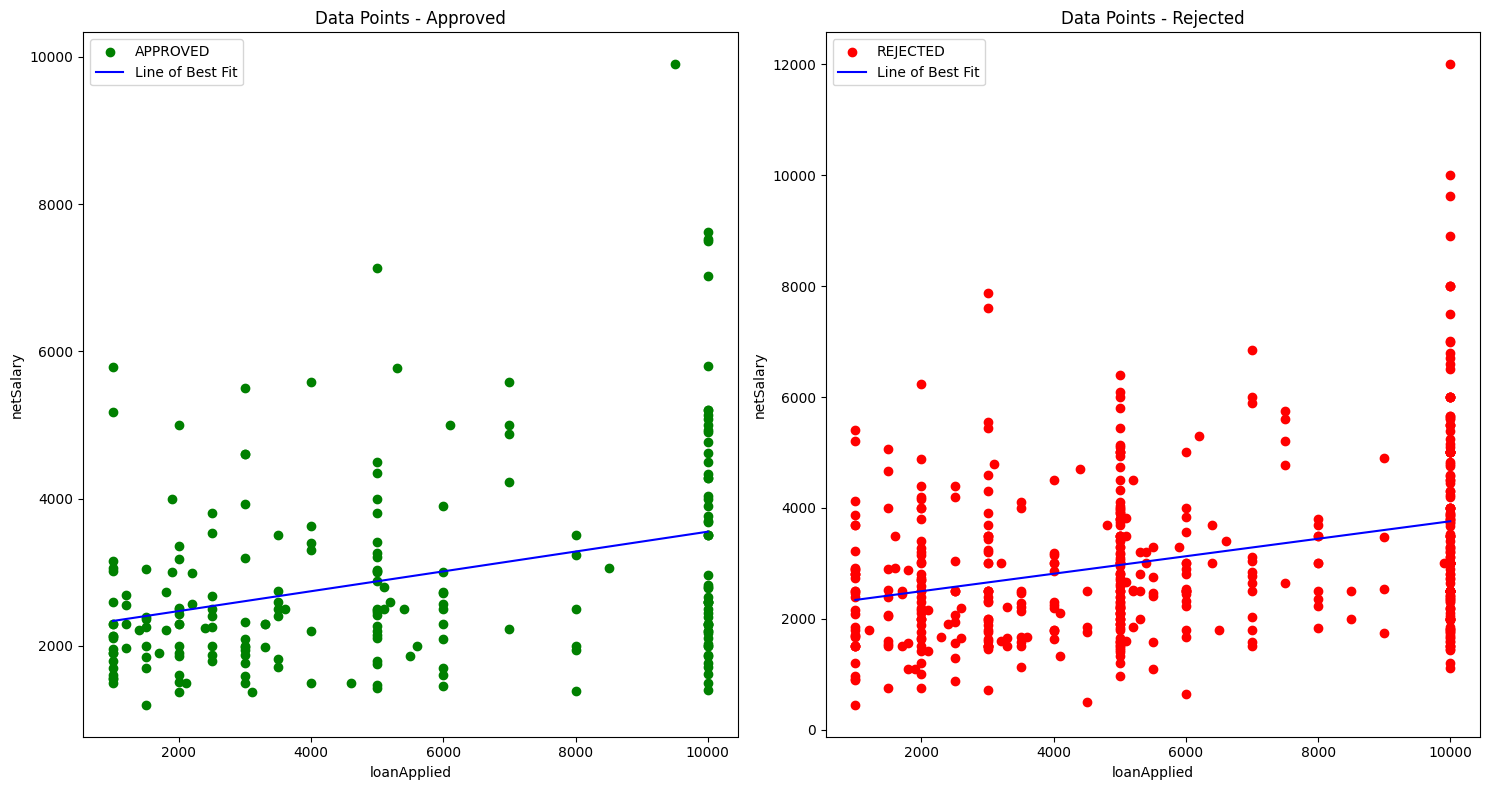

In [172]:
#Checking relationship between net salary and loan applied

colors = {'APPROVED': 'green', 'REJECTED': 'red'}

fig, axs = plt.subplots(1, 2, figsize=(15, 8))

#Scatter plot for APPROVED applications
approved_data = mdf_filtered[mdf_filtered['applicationStatus'] == 'APPROVED']
axs[0].scatter(approved_data['loanApplied'], approved_data['netSalary'], c='green', label='APPROVED')

#Linear regression model for APPROVED applications
regression_model_approved = LinearRegression()
regression_model_approved.fit(approved_data[['loanApplied']], approved_data['netSalary'])
x_approved = np.linspace(min(approved_data['loanApplied']), max(approved_data['loanApplied']), 100)
y_approved = regression_model_approved.predict(x_approved[:, np.newaxis])
axs[0].plot(x_approved, y_approved, color='blue', label='Line of Best Fit')

axs[0].set_xlabel('loanApplied')
axs[0].set_ylabel('netSalary')
axs[0].set_title('Data Points - Approved')
axs[0].legend()

#Scatter plot for REJECTED applications
rejected_data = mdf_filtered[mdf_filtered['applicationStatus'] == 'REJECTED']
axs[1].scatter(rejected_data['loanApplied'], rejected_data['netSalary'], c='red', label='REJECTED')

#Linear regression model for REJECTED applications
regression_model_rejected = LinearRegression()
regression_model_rejected.fit(rejected_data[['loanApplied']], rejected_data['netSalary'])
x_rejected = np.linspace(min(rejected_data['loanApplied']), max(rejected_data['loanApplied']), 100)
y_rejected = regression_model_rejected.predict(x_rejected[:, np.newaxis])
axs[1].plot(x_rejected, y_rejected, color='blue', label='Line of Best Fit')

axs[1].set_xlabel('loanApplied')
axs[1].set_ylabel('netSalary')
axs[1].set_title('Data Points - Rejected')
axs[1].legend()

plt.tight_layout()
plt.show()


c:\Users\rtr\Work\Python\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\rtr\AppData\Local\Temp\ipykernel_788\2209500916.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  approved_df['cluster'] = approved_clusters
c:\Users\rtr\Work\Python\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\rtr\AppData\Local\Temp\ipykernel_788\2209500

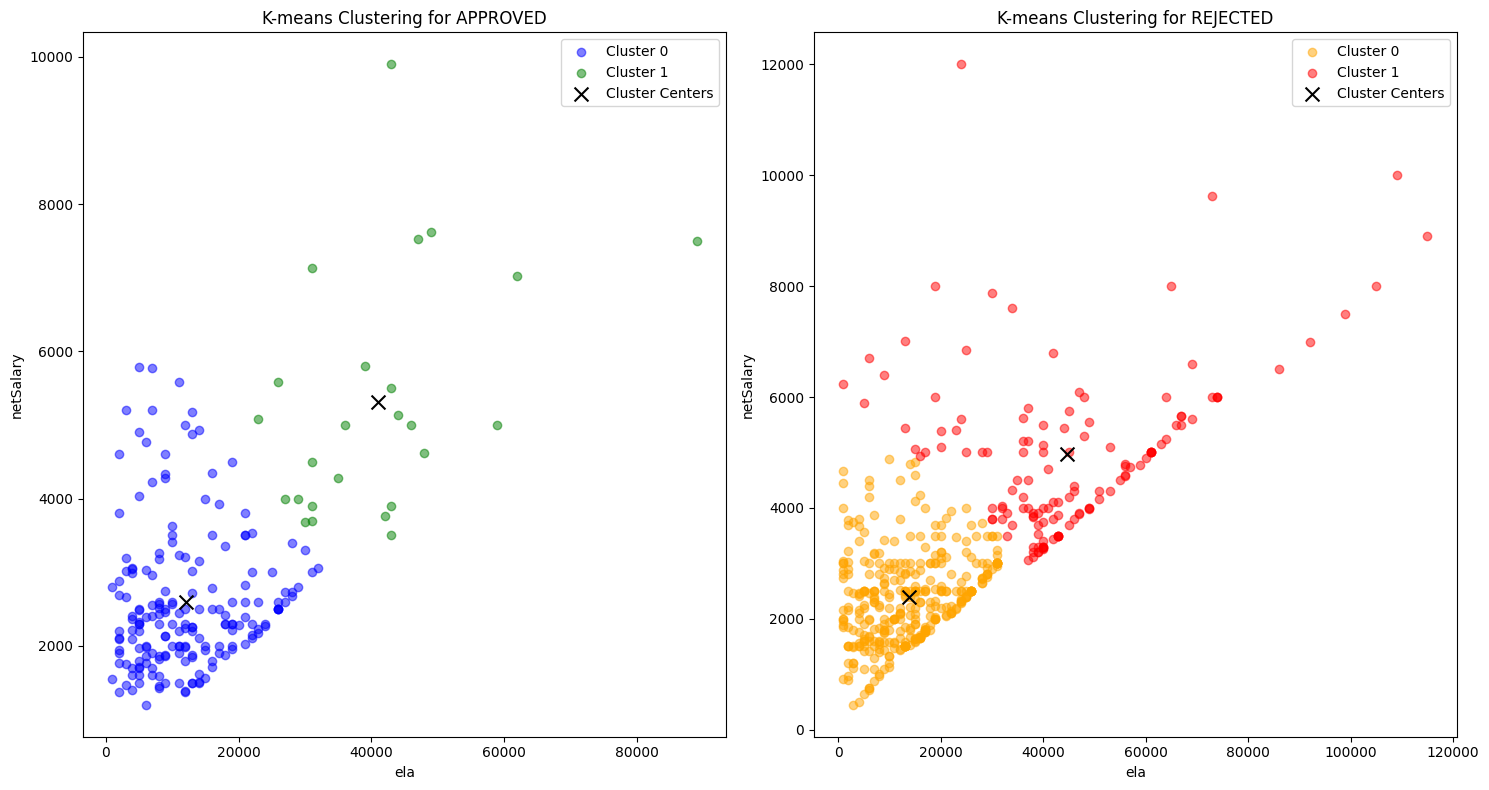

In [173]:
#Check for unique clusters

approved_df = mdf_filtered[mdf_filtered['applicationStatus'] == 'APPROVED']
rejected_df = mdf_filtered[mdf_filtered['applicationStatus'] == 'REJECTED']

#clusters for APPROVED applications
approved_data = approved_df[['ela', 'netSalary']]
approved_scaler = StandardScaler()
approved_scaled_data = approved_scaler.fit_transform(approved_data)
approved_k = 2  
approved_kmeans = KMeans(n_clusters=approved_k, random_state=42)
approved_clusters = approved_kmeans.fit_predict(approved_scaled_data)
approved_df['cluster'] = approved_clusters
approved_cluster_centers = approved_scaler.inverse_transform(approved_kmeans.cluster_centers_)
approved_cluster_centers_df = pd.DataFrame(approved_cluster_centers, columns=approved_data.columns)

#Dclusters for REJECTED applications
rejected_data = rejected_df[['ela', 'netSalary']]
rejected_scaler = StandardScaler()
rejected_scaled_data = rejected_scaler.fit_transform(rejected_data)
rejected_k = 2 
rejected_kmeans = KMeans(n_clusters=rejected_k, random_state=42)
rejected_clusters = rejected_kmeans.fit_predict(rejected_scaled_data)
rejected_df['cluster'] = rejected_clusters
rejected_cluster_centers = rejected_scaler.inverse_transform(rejected_kmeans.cluster_centers_)
rejected_cluster_centers_df = pd.DataFrame(rejected_cluster_centers, columns=rejected_data.columns)

approved_colors = ['blue', 'green']
rejected_colors = ['orange', 'red'] 

fig, axs = plt.subplots(1, 2, figsize=(15, 8))

#Plot for APPROVED applications
for cluster_num in range(approved_k):
    cluster_data = approved_df[approved_df['cluster'] == cluster_num]
    axs[0].scatter(cluster_data['ela'], cluster_data['netSalary'], c=approved_colors[cluster_num],
                   label=f'Cluster {cluster_num}', alpha=0.5)

axs[0].scatter(approved_cluster_centers_df['ela'], approved_cluster_centers_df['netSalary'],
                c='black', marker='x', s=100, label='Cluster Centers')
axs[0].set_xlabel('ela')
axs[0].set_ylabel('netSalary')
axs[0].legend()
axs[0].set_title('K-means Clustering for APPROVED')

#Plot for REJECTED applications
for cluster_num in range(rejected_k):
    cluster_data = rejected_df[rejected_df['cluster'] == cluster_num]
    axs[1].scatter(cluster_data['ela'], cluster_data['netSalary'], c=rejected_colors[cluster_num],
                   label=f'Cluster {cluster_num}', alpha=0.5)

axs[1].scatter(rejected_cluster_centers_df['ela'], rejected_cluster_centers_df['netSalary'],
                c='black', marker='x', s=100, label='Cluster Centers')
axs[1].set_xlabel('ela')
axs[1].set_ylabel('netSalary')
axs[1].legend()
axs[1].set_title('K-means Clustering for REJECTED')

plt.tight_layout()
plt.show()


In [174]:
#Creating new column priceGap - column will show the difference between what the applicant is eligible to loan and what they actually applied for.
mdf_filtered['priceGap'] = mdf_filtered['ela'] - mdf_filtered['loanApplied']

C:\Users\rtr\AppData\Local\Temp\ipykernel_788\1326682071.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mdf_filtered['priceGap'] = mdf_filtered['ela'] - mdf_filtered['loanApplied']


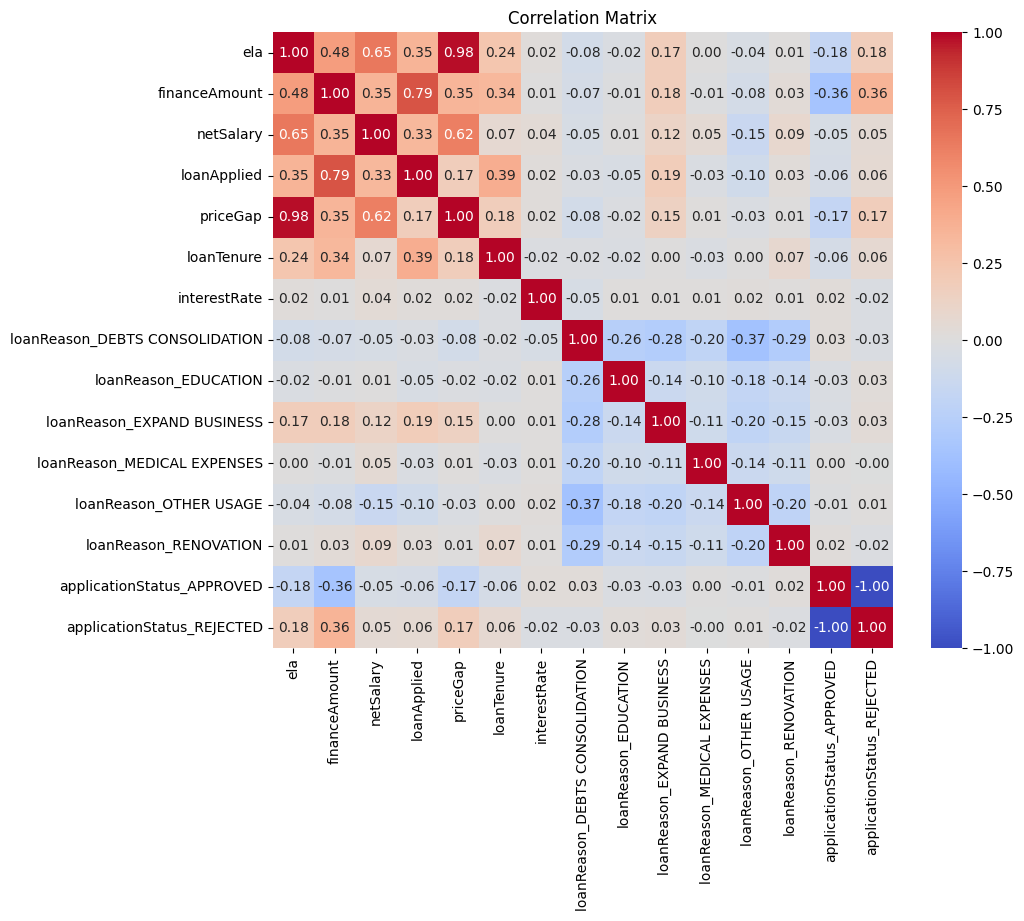

In [175]:
#Corelation Matrix
selected_columns = ['ela', 'financeAmount', 'netSalary', 'loanApplied', 'priceGap', 'loanTenure', 'interestRate', 'loanReason', 'applicationStatus']
selected_df = mdf_filtered[selected_columns]

selected_df = pd.get_dummies(selected_df, columns=['loanReason', 'applicationStatus'])

correlation_matrix = selected_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


# Training

In [176]:
#Drop columns before splitting
columns_to_drop = ['state', 'jobTitle', 'loanReason', 'cluster', 'price_range_label']
mdf_filtered.drop(columns=columns_to_drop, inplace=True)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

X = mdf_filtered[['ela', 'financeAmount', 'netSalary', 'priceGap']]
y = mdf_filtered['applicationStatus']

#Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#Initialize LabelEncoder
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

C:\Users\rtr\AppData\Local\Temp\ipykernel_788\6347642.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mdf_filtered.drop(columns=columns_to_drop, inplace=True)


# Testing Models

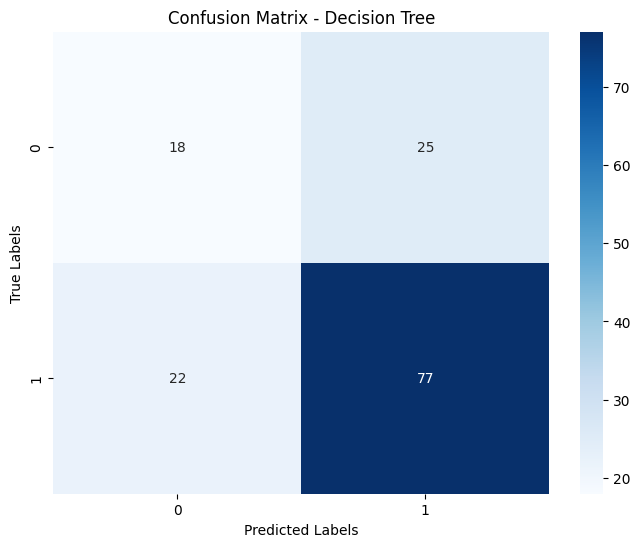

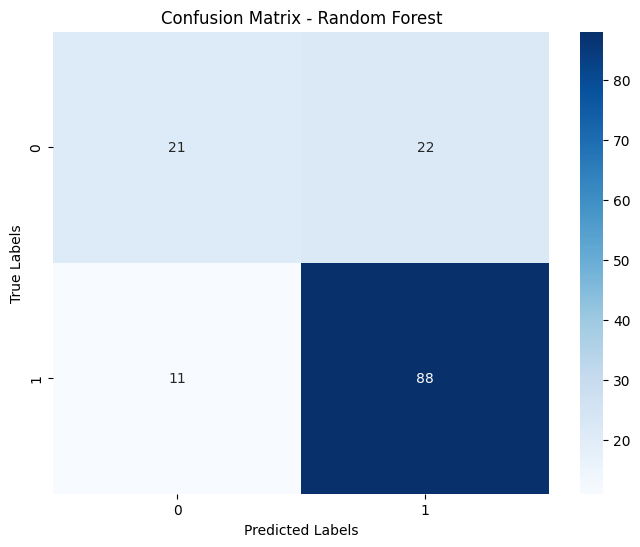

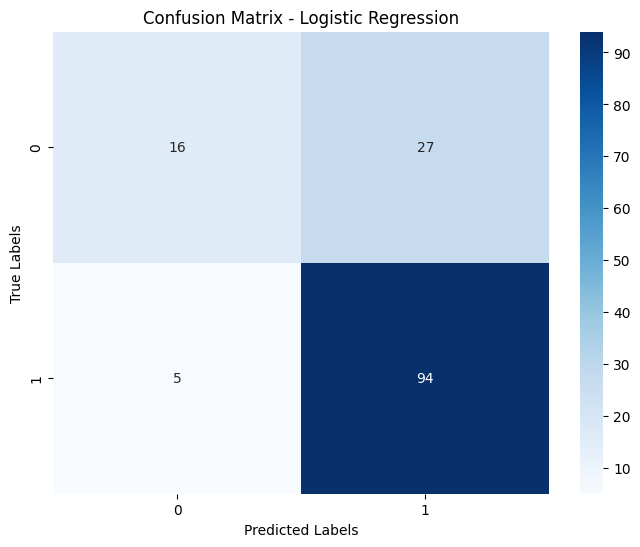

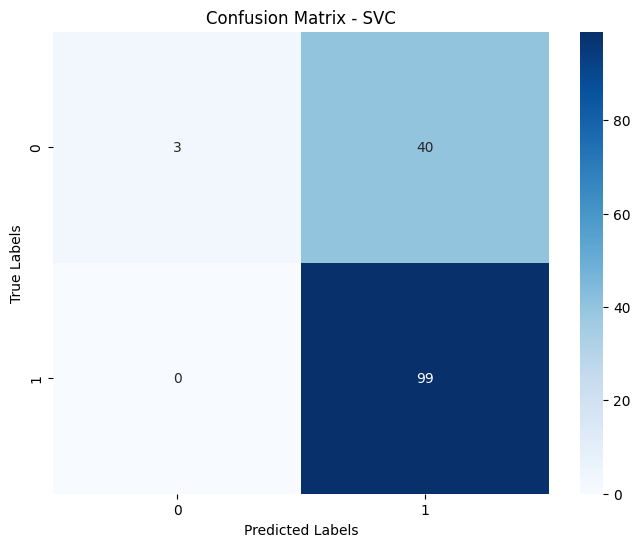

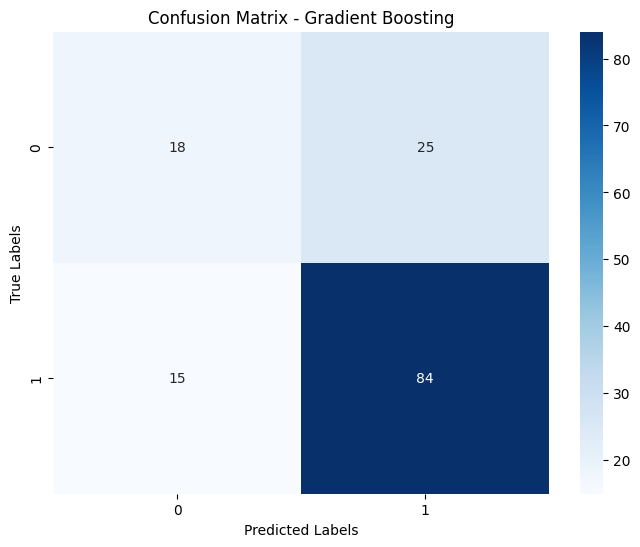

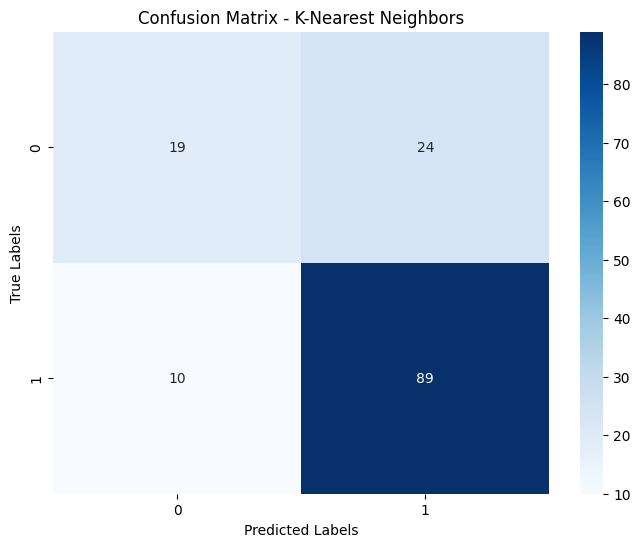

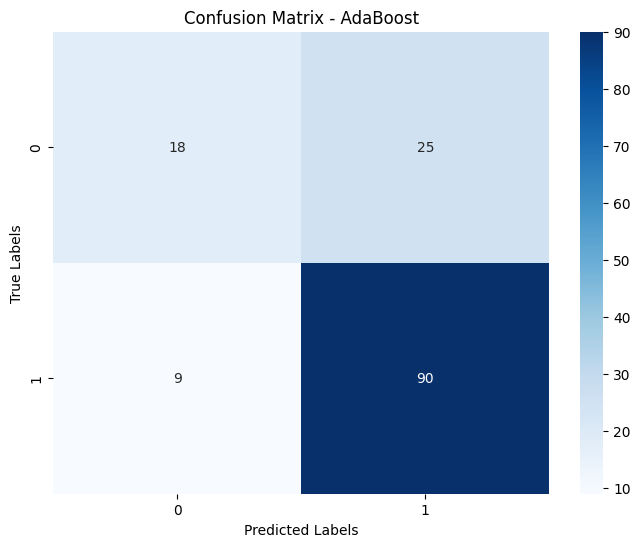

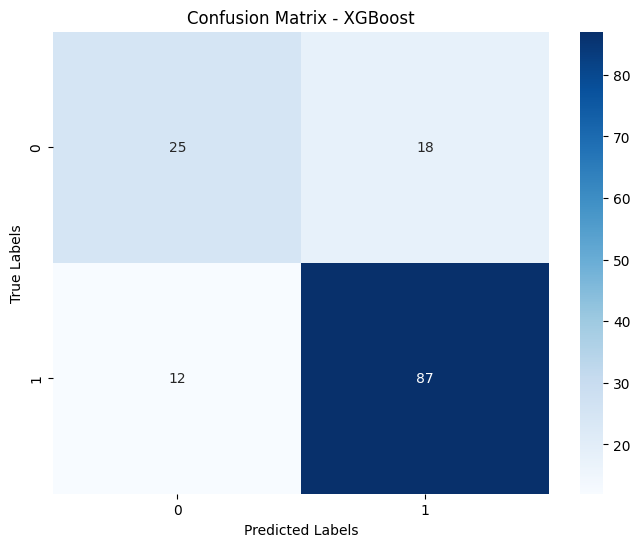

[LightGBM] [Info] Number of positive: 397, number of negative: 168
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000067 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 353
[LightGBM] [Info] Number of data points in the train set: 565, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.702655 -> initscore=0.859972
[LightGBM] [Info] Start training from score 0.859972
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

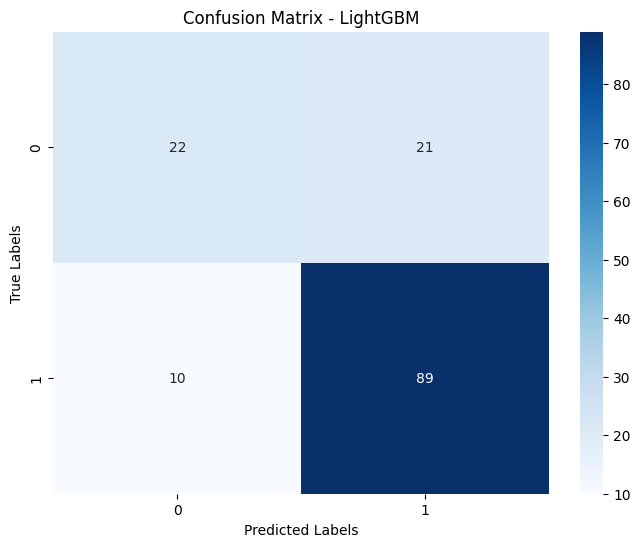

Performance Metrics:

Decision Tree:
Accuracy: 0.67
Precision: 0.75
Recall: 0.78
F1-score: 0.77

Random Forest:
Accuracy: 0.77
Precision: 0.80
Recall: 0.89
F1-score: 0.84

Logistic Regression:
Accuracy: 0.77
Precision: 0.78
Recall: 0.95
F1-score: 0.85

SVC:
Accuracy: 0.72
Precision: 0.71
Recall: 1.00
F1-score: 0.83

Gradient Boosting:
Accuracy: 0.72
Precision: 0.77
Recall: 0.85
F1-score: 0.81

K-Nearest Neighbors:
Accuracy: 0.76
Precision: 0.79
Recall: 0.90
F1-score: 0.84

AdaBoost:
Accuracy: 0.76
Precision: 0.78
Recall: 0.91
F1-score: 0.84

XGBoost:
Accuracy: 0.79
Precision: 0.83
Recall: 0.88
F1-score: 0.85

LightGBM:
Accuracy: 0.78
Precision: 0.81
Recall: 0.90
F1-score: 0.85


In [186]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

classifiers = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'SVC': SVC(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42),
    'LightGBM': lgb.LGBMClassifier(random_state=42)
}

accuracy_dict = {}
precision_dict = {}
recall_dict = {}
f1_dict = {}

#Loop through classifiers
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test) 
    
    #Performance metrics
    accuracy_dict[name] = accuracy_score(y_test, y_pred)
    precision_dict[name] = precision_score(y_test, y_pred)
    recall_dict[name] = recall_score(y_test, y_pred)
    f1_dict[name] = f1_score(y_test, y_pred)

    #Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()

print('Performance Metrics:')
for name in classifiers.keys():
    print(f'\n{name}:')
    print(f'Accuracy: {accuracy_dict[name]:.2f}')
    print(f'Precision: {precision_dict[name]:.2f}')
    print(f'Recall: {recall_dict[name]:.2f}')
    print(f'F1-score: {f1_dict[name]:.2f}')

# Fine-tuning

In [190]:
from sklearn.model_selection import GridSearchCV
import joblib
#Parameter grids for GridSearchCV
param_grids = {
    'Decision Tree': {'max_depth': [None, 5, 10, 15],
                      'min_samples_split': [2, 5, 10],
                      'min_samples_leaf': [1, 2, 4],
                      'max_features': ['auto', 'sqrt', 'log2']},
    
    'Random Forest': {'n_estimators': [50, 100, 200],
                      'max_depth': [None, 5, 10],
                      'min_samples_split': [2, 5, 10],
                      'min_samples_leaf': [1, 2, 4],
                      'max_features': ['auto', 'sqrt', 'log2']},
    
    'Logistic Regression': {'C': [0.001, 0.01, 0.1, 1, 10, 100],
                             'penalty': ['l1', 'l2'],
                             'solver': ['liblinear', 'saga']},
    
    'SVC': {'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf'],
            'gamma': ['scale', 'auto']},
    
    'Gradient Boosting': {'n_estimators': [50, 100, 200],
                          'learning_rate': [0.01, 0.1, 0.5],
                          'max_depth': [3, 5, 10],
                          'min_samples_split': [2, 5, 10],
                          'min_samples_leaf': [1, 2, 4],
                          'max_features': ['auto', 'sqrt', 'log2']},
    
    'K-Nearest Neighbors': {'n_neighbors': [3, 5, 7, 9],
                            'weights': ['uniform', 'distance'],
                            'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']},
    
    'AdaBoost': {'n_estimators': [50, 100, 200],
                 'learning_rate': [0.01, 0.1, 1.0],
                 'algorithm': ['SAMME', 'SAMME.R']},
    
    'XGBoost': {'n_estimators': [50, 100, 200],
                'learning_rate': [0.01, 0.1, 0.5],
                'max_depth': [3, 5, 10],
                'subsample': [0.8, 1.0],
                'colsample_bytree': [0.8, 1.0]},
    
    'LightGBM': {'n_estimators': [50, 100, 200],
                 'learning_rate': [0.01, 0.1, 0.5],
                 'max_depth': [3, 5, 10],
                 'num_leaves': [31, 63, 127]}
}

accuracy_dict = {}
precision_dict = {}
recall_dict = {}
f1_dict = {}
best_models = {}
best_params = {}

#Loop and apply GridSearchCV
for name, clf in classifiers.items():
    param_grid = param_grids[name]
    grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_clf = grid_search.best_estimator_
    best_models[name] = best_clf
    best_params[name] = grid_search.best_params_

    y_pred = best_clf.predict(X_test)
    
    #performance metrics
    accuracy_dict[name] = accuracy_score(y_test, y_pred)
    precision_dict[name] = precision_score(y_test, y_pred)
    recall_dict[name] = recall_score(y_test, y_pred)
    f1_dict[name] = f1_score(y_test, y_pred)



#Print and save best models and parameters
print('Best Models and Parameters:')
for name in classifiers.keys():
    print(f'\n{name}:')
    print(f'Best Parameters: {best_params[name]}')
    print(f'Accuracy: {accuracy_dict[name]:.2f}')
    print(f'Precision: {precision_dict[name]:.2f}')
    print(f'Recall: {recall_dict[name]:.2f}')
    print(f'F1-score: {f1_dict[name]:.2f}')
    
    #Save best model
    joblib.dump(best_models[name], f'best_model_{name}.joblib')

c:\Users\rtr\Work\Python\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
180 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
76 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\rtr\Work\Python\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\rtr\Work\Python\lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\rtr\Work\Python\lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\rtr\Work\Python\lib\site-package

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 397, number of negative: 168
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000127 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 353
[LightGBM] [Info] Number of data points in the train set: 565, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.702655 -> initscore=0.859972
[LightGBM] [Info] Start training from score 0.859972
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further

Accuracy: 0.77
Precision: 0.78
Recall: 0.95
F1-score: 0.85


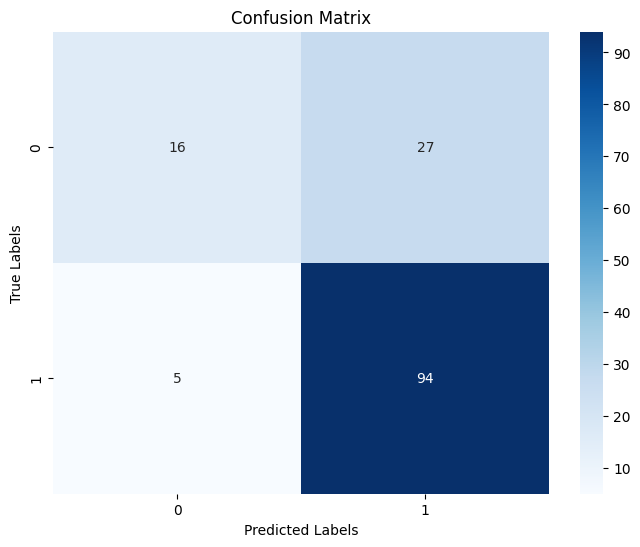

In [195]:
loaded_model = joblib.load('best_model_Logistic Regression.joblib') #change model accordingly

y_pred = loaded_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred) 
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')

#confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()